Our aim is to detect the fraud.we have a dataset having fetures 

`step` - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

`type` - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

`amount` - amount of the transaction in local currency.

`nameOrig` - customer who started the transaction

`oldbalanceOrg` - initial balance before the transaction

`newbalanceOrig` - new balance after the transaction

`nameDest` - customer who is the recipient of the transaction

`oldbalanceDest` - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

`newbalanceDest` - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

`isFraud` - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

`isFlaggedFraud` - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18294124862813730786
xla_global_id: -1
]


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
data_0=pd.read_csv('0.csv')
data_1=pd.read_csv('1.csv')
data_2=pd.read_csv('2.csv')
data_3=pd.read_csv('3.csv')
data_4=pd.read_csv('4.csv')
data_5=pd.read_csv('5.csv')
data_6=pd.read_csv('6.csv')

In [4]:
df=pd.concat([data_0,data_1,data_2,data_3,data_4,data_5,data_6])
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
908940,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
908941,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
908942,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
908943,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
flagged = df[df["isFlaggedFraud"]==1]
one=df[df["isFraud"]==1]
zero=df[df["isFraud"]==0]
zeros = zero.sample(8229)
data = pd.concat([one,zeros,flagged])
data["isFraud"].value_counts()

1    8229
0    8229
Name: isFraud, dtype: int64

In [6]:
df_seen = data

In [7]:
learning_feature = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud']

In [8]:
learning = df_seen[[x for x in learning_feature]]

In [9]:
learning_onehot = pd.get_dummies(learning)
learning_onehot

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,181.00,181.00,0.00,0.0,0.0,1,0,0,0,0,0,1
3,181.00,181.00,0.00,21182.0,0.0,1,0,0,1,0,0,0
251,2806.00,2806.00,0.00,0.0,0.0,1,0,0,0,0,0,1
252,2806.00,2806.00,0.00,26202.0,0.0,1,0,0,1,0,0,0
680,20128.00,20128.00,0.00,0.0,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
842339,3441041.46,3441041.46,3441041.46,0.0,0.0,1,1,0,0,0,0,1
897550,3171085.59,3171085.59,3171085.59,0.0,0.0,1,1,0,0,0,0,1
908785,10000000.00,17316255.05,17316255.05,0.0,0.0,1,1,0,0,0,0,1
908787,7316255.05,17316255.05,17316255.05,0.0,0.0,1,1,0,0,0,0,1


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(learning_onehot),columns = learning_onehot.columns)

In [11]:
x = dataset.drop(columns=["isFraud"])
y = dataset["isFraud"]

In [12]:
x

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.000007,0.000003,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000007,0.000003,0.000000,0.000090,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000112,0.000047,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000112,0.000047,0.000000,0.000111,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000800,0.000338,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
16453,0.136741,0.057750,0.069397,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16454,0.126014,0.053219,0.063952,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16455,0.397384,0.290614,0.349223,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16456,0.290736,0.290614,0.349223,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42,stratify=y)

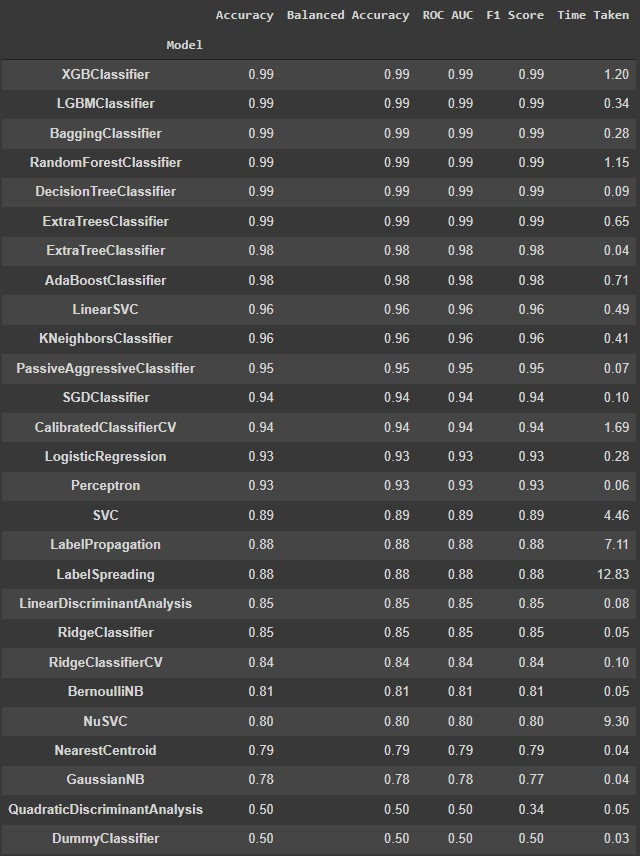

In [14]:
from  xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier ,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [15]:
%%time 

xgb = XGBClassifier()
xgb.fit(x_train,y_train)
lgbm = LGBMClassifier()
lgbm.fit(x_train,y_train)
bagg = BaggingClassifier()
bagg.fit(x_train,y_train)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
lin = LinearSVC()
lin.fit(x_train,y_train)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

[00:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 2.79 s


KNeighborsClassifier()

In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
estimator_list = [
    ('xgb',xgb),
    ('lgbm',lgbm),
    ('bagg',bagg),
    ('rf',rf),
    ('et',et),
    ('dc',dc),
    # ('ada',ada),
    # ('lin',lin),
    # ('knn',knn) 
    ]

In [18]:
# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=XGBClassifier(estimators=1000)
)

In [19]:
%%time
stack_model.fit(x_train, y_train)

[00:16:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              enable_categorical=False, gamma=0,
                                              gpu_id=-1, importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=6,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='()',
                                              n_est...
                                                 interaction_constraints=None,
            

In [20]:
pred = stack_model.predict(x_test)

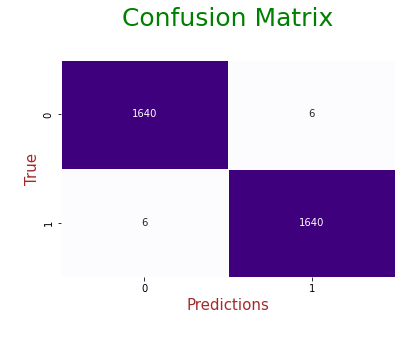

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, pred))
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True, fmt="d",linewidths=.5,cmap="Purples",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1646
         1.0       1.00      1.00      1.00      1646

    accuracy                           1.00      3292
   macro avg       1.00      1.00      1.00      3292
weighted avg       1.00      1.00      1.00      3292



In [23]:
data_unseen =pd.concat([df,data]).drop_duplicates(keep=False)
data_unseen

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
908644,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
908645,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
908646,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
908647,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


In [24]:
data_unseen[data_unseen["isFraud"] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [25]:
learning = data_unseen[[x for x in learning_feature]]

In [26]:
learning_onehot = pd.get_dummies(learning)
learning_onehot

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.00,0.00,0,0,0,0,0,1,0
4,11668.14,41554.0,29885.86,0.00,0.00,0,0,0,0,0,1,0
5,7817.71,53860.0,46042.29,0.00,0.00,0,0,0,0,0,1,0
6,7107.77,183195.0,176087.23,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
908644,8634.29,518802.0,510167.71,0.00,0.00,0,0,0,0,0,1,0
908645,159188.22,3859.0,0.00,0.00,159188.22,0,0,0,1,0,0,0
908646,186273.84,168046.0,0.00,24893.67,211167.51,0,0,0,1,0,0,0
908647,82096.45,13492.0,0.00,0.00,82096.45,0,0,0,0,0,0,1


In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(learning_onehot),columns = learning_onehot.columns)

In [28]:
x = dataset.drop(columns=["isFraud"])
y = dataset["isFraud"]

In [29]:
x

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.000106,0.003883,0.003669,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000020,0.000485,0.000444,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000126,0.000948,0.000684,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000085,0.001229,0.001054,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000077,0.004181,0.004031,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6346173,0.000093,0.011840,0.011678,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
6346174,0.001722,0.000088,0.000000,0.00000,0.000447,0.0,0.0,1.0,0.0,0.0,0.0
6346175,0.002015,0.003835,0.000000,0.00007,0.000593,0.0,0.0,1.0,0.0,0.0,0.0
6346176,0.000888,0.000308,0.000000,0.00000,0.000230,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
%%time
predictions = stack_model.predict(x)
predictions

Wall time: 1min 57s


array([0., 0., 0., ..., 1., 1., 0.])

In [31]:
y_pred=[]

for x in predictions:
    if x>=.5 :
        y_pred.append(1)
    else:
        y_pred.append(0)

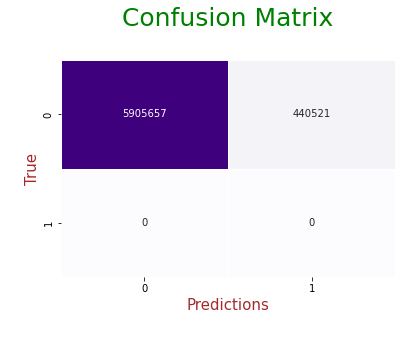

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True, fmt="d",linewidths=.5,cmap="Purples",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96   6346178
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93   6346178
   macro avg       0.50      0.47      0.48   6346178
weighted avg       1.00      0.93      0.96   6346178

